In [1]:
import os
os.chdir("../")
from utils import *
os.chdir("test_pop_ini")

In [21]:
def vs_all(P):
    A=np.zeros((len(P),len(P)))
    for id_i,i in enumerate(P):
        for id_j,j in enumerate(P):
            A[id_i][id_j]=np.linalg.norm(abs(i-j))
    return A.mean(),A.std()

In [22]:
def bin_fixed(individuals,gens):
    M=np.random.randint(2,size=(individuals,gens))
       
    return M
def uniform(individuals,gens):
    M=((np.random.rand(gens,individuals) < np.random.rand(individuals))*1).T
    
    unq, ind_unq= np.unique(M, axis=0,return_index=True)
    M=M[np.sort(ind_unq)]
    while len(M) < individuals:
        N=((np.random.rand(gens,individuals-len(M)) < np.random.rand(individuals-len(M)))*1).T
        M=np.concatenate((M,N))
        unq, ind_unq= np.unique(M, axis=0,return_index=True)
        M=M[np.sort(ind_unq)]
        
    return M

def k_random(individuals,gens):
    k=[round(np.random.rand()*gens) for i in range(individuals)]
    a=[np.random.choice(np.arange(gens),size=i,replace=False) for i in k]
    P=np.zeros((individuals,gens))
    for i,j in zip(P,a):
        i[j]=1
    return P.astype(int)

def p_bin(individuals,gens):
    
    
    def generate_individual(gens,p=None):
        if not p :
            p=np.random.rand()        
        individual=np.ndarray.tolist(np.random.binomial(n=1,p=p,size=gens))        
        return np.array(individual)
    
    P=np.zeros((individuals,gens))
    for i in range(individuals):
        ind=generate_individual(gens)
        P[i]=ind

    unq, ind_unq= np.unique(P, axis=0,return_index=True)

    while len(unq) < individuals:
        for i in set(np.arange(individuals))-set(ind_unq):
            ind=generate_individual(gens)
            P[i]=ind
        unq, ind_unq= np.unique(P, axis=0,return_index=True)

    return P.astype(int)


499.884 15.707022123878225


(22.33475751987359, 0.7900775458457976)

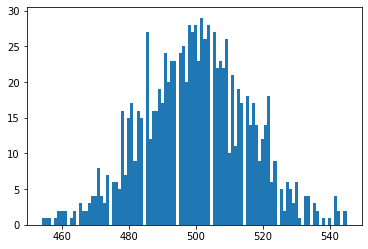

In [23]:
P=bin_fixed(1000,1000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

507.764 286.54393433468454


(21.98665647123739, 4.01556536689357)

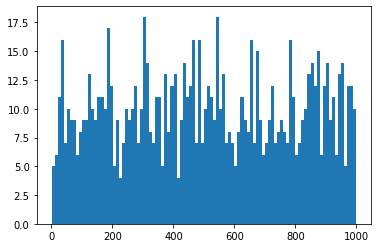

In [24]:
P=uniform(1000,1000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

491.609 290.9340855228208


(21.962706001481624, 4.141806742531891)

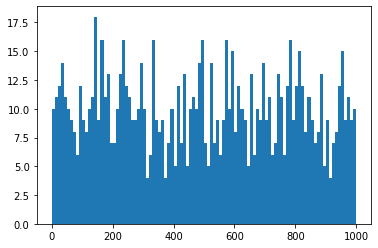

In [25]:
P=p_bin(1000,1000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

505.889 289.32938440296726


(21.97473194409099, 4.088239961810826)

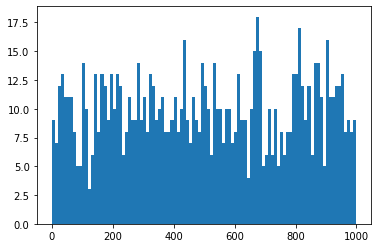

In [26]:
P=k_random(1000,1000)
#A=np.array([int(''.join([str(i) for i in individual]),2)/int(''.join([str(1) for i in range(len(individual))]),2) for individual in P])
A=P.sum(axis=1)
plt.hist(A,bins=100)
print(A.mean(),A.std())
vs_all(P)

(499.5, 288.6749902572095)

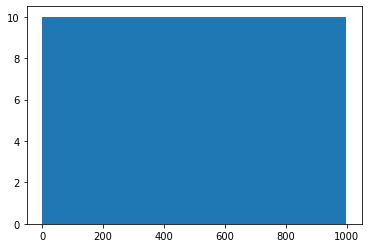

In [27]:
A=np.arange(1000)
plt.hist(A,bins=100)
A.mean(),A.std()

(509.927, 283.4236646277089)

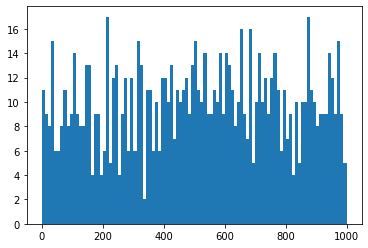

In [28]:
A=np.around(np.random.rand(1000)*1000)
plt.hist(A,bins=100)
A.mean(),A.std()

In [29]:
from test_pop_ini import *

2611.97375 1368.3987469158753
2589.85875 1372.6763069997376
2475.25375 34.39904593062866


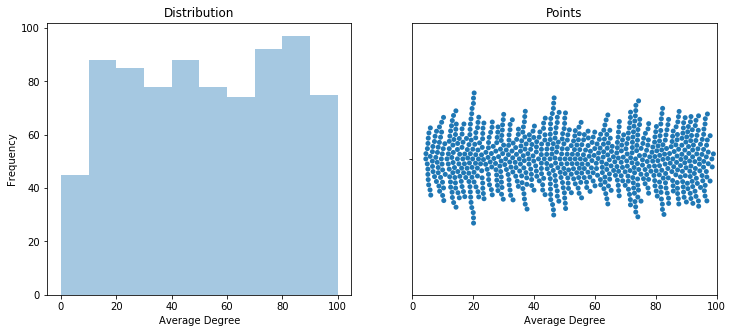

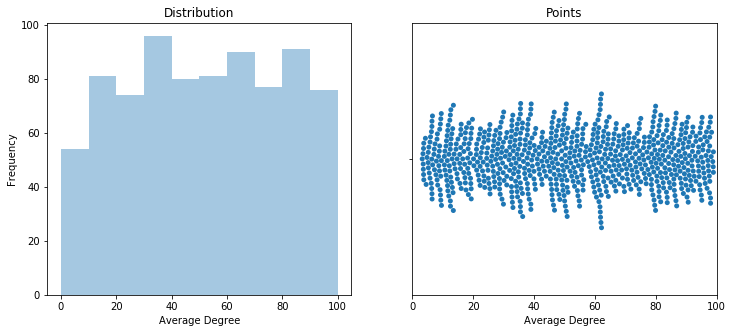

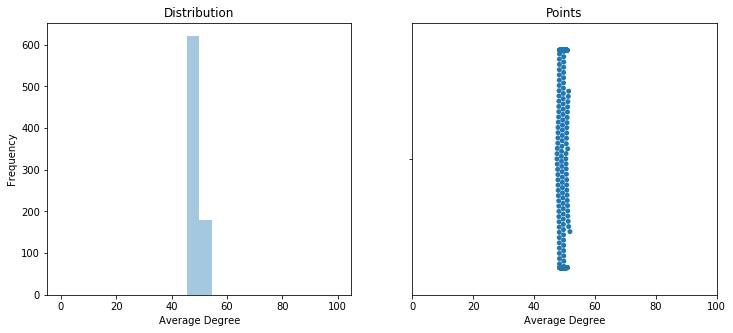

In [30]:
test(saves=["binomial_trick.pdf","binomial.pdf","random_int.pdf"])